In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_behaviour.csv', sep=';')
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [4]:
df.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.columns = df.columns.str.replace(' ','_')

In [11]:
df

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [12]:
df['avg_order_value'] = df['avg_order_value'].replace(',' , '.', regex= True).astype(float)
df['discount_rate_per_visited_products'] = df['discount_rate_per_visited_products'].replace(',' , '.', regex= True).astype(float)
df['product_detail_view_per_app_session'] = df['product_detail_view_per_app_session'].replace(',' , '.', regex= True).astype(float)
df['add_to_cart_per_session'] = df['add_to_cart_per_session'].replace(',' , '.', regex= True).astype(float)

df.dtypes

account_length                           int64
location_code                            int64
user_id                                  int64
credit_card_info_save                   object
push_status                             object
add_to_wishlist                          int64
desktop_sessions                         int64
app_sessions                             int64
desktop_transactions                     int64
total_product_detail_views               int64
session_duration                         int64
promotion_clicks                         int64
avg_order_value                        float64
sale_product_views                       int64
discount_rate_per_visited_products     float64
product_detail_view_per_app_session    float64
app_transactions                         int64
add_to_cart_per_session                float64
customer_service_calls                   int64
churn                                    int64
dtype: object

In [13]:
df.describe()

,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [14]:
df.describe(exclude= ['int','float'])

,credit_card_info_save,push_status
count,3333,3333
unique,2,2
top,no,no
freq,3010,2411


In [15]:
df.columns

Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')

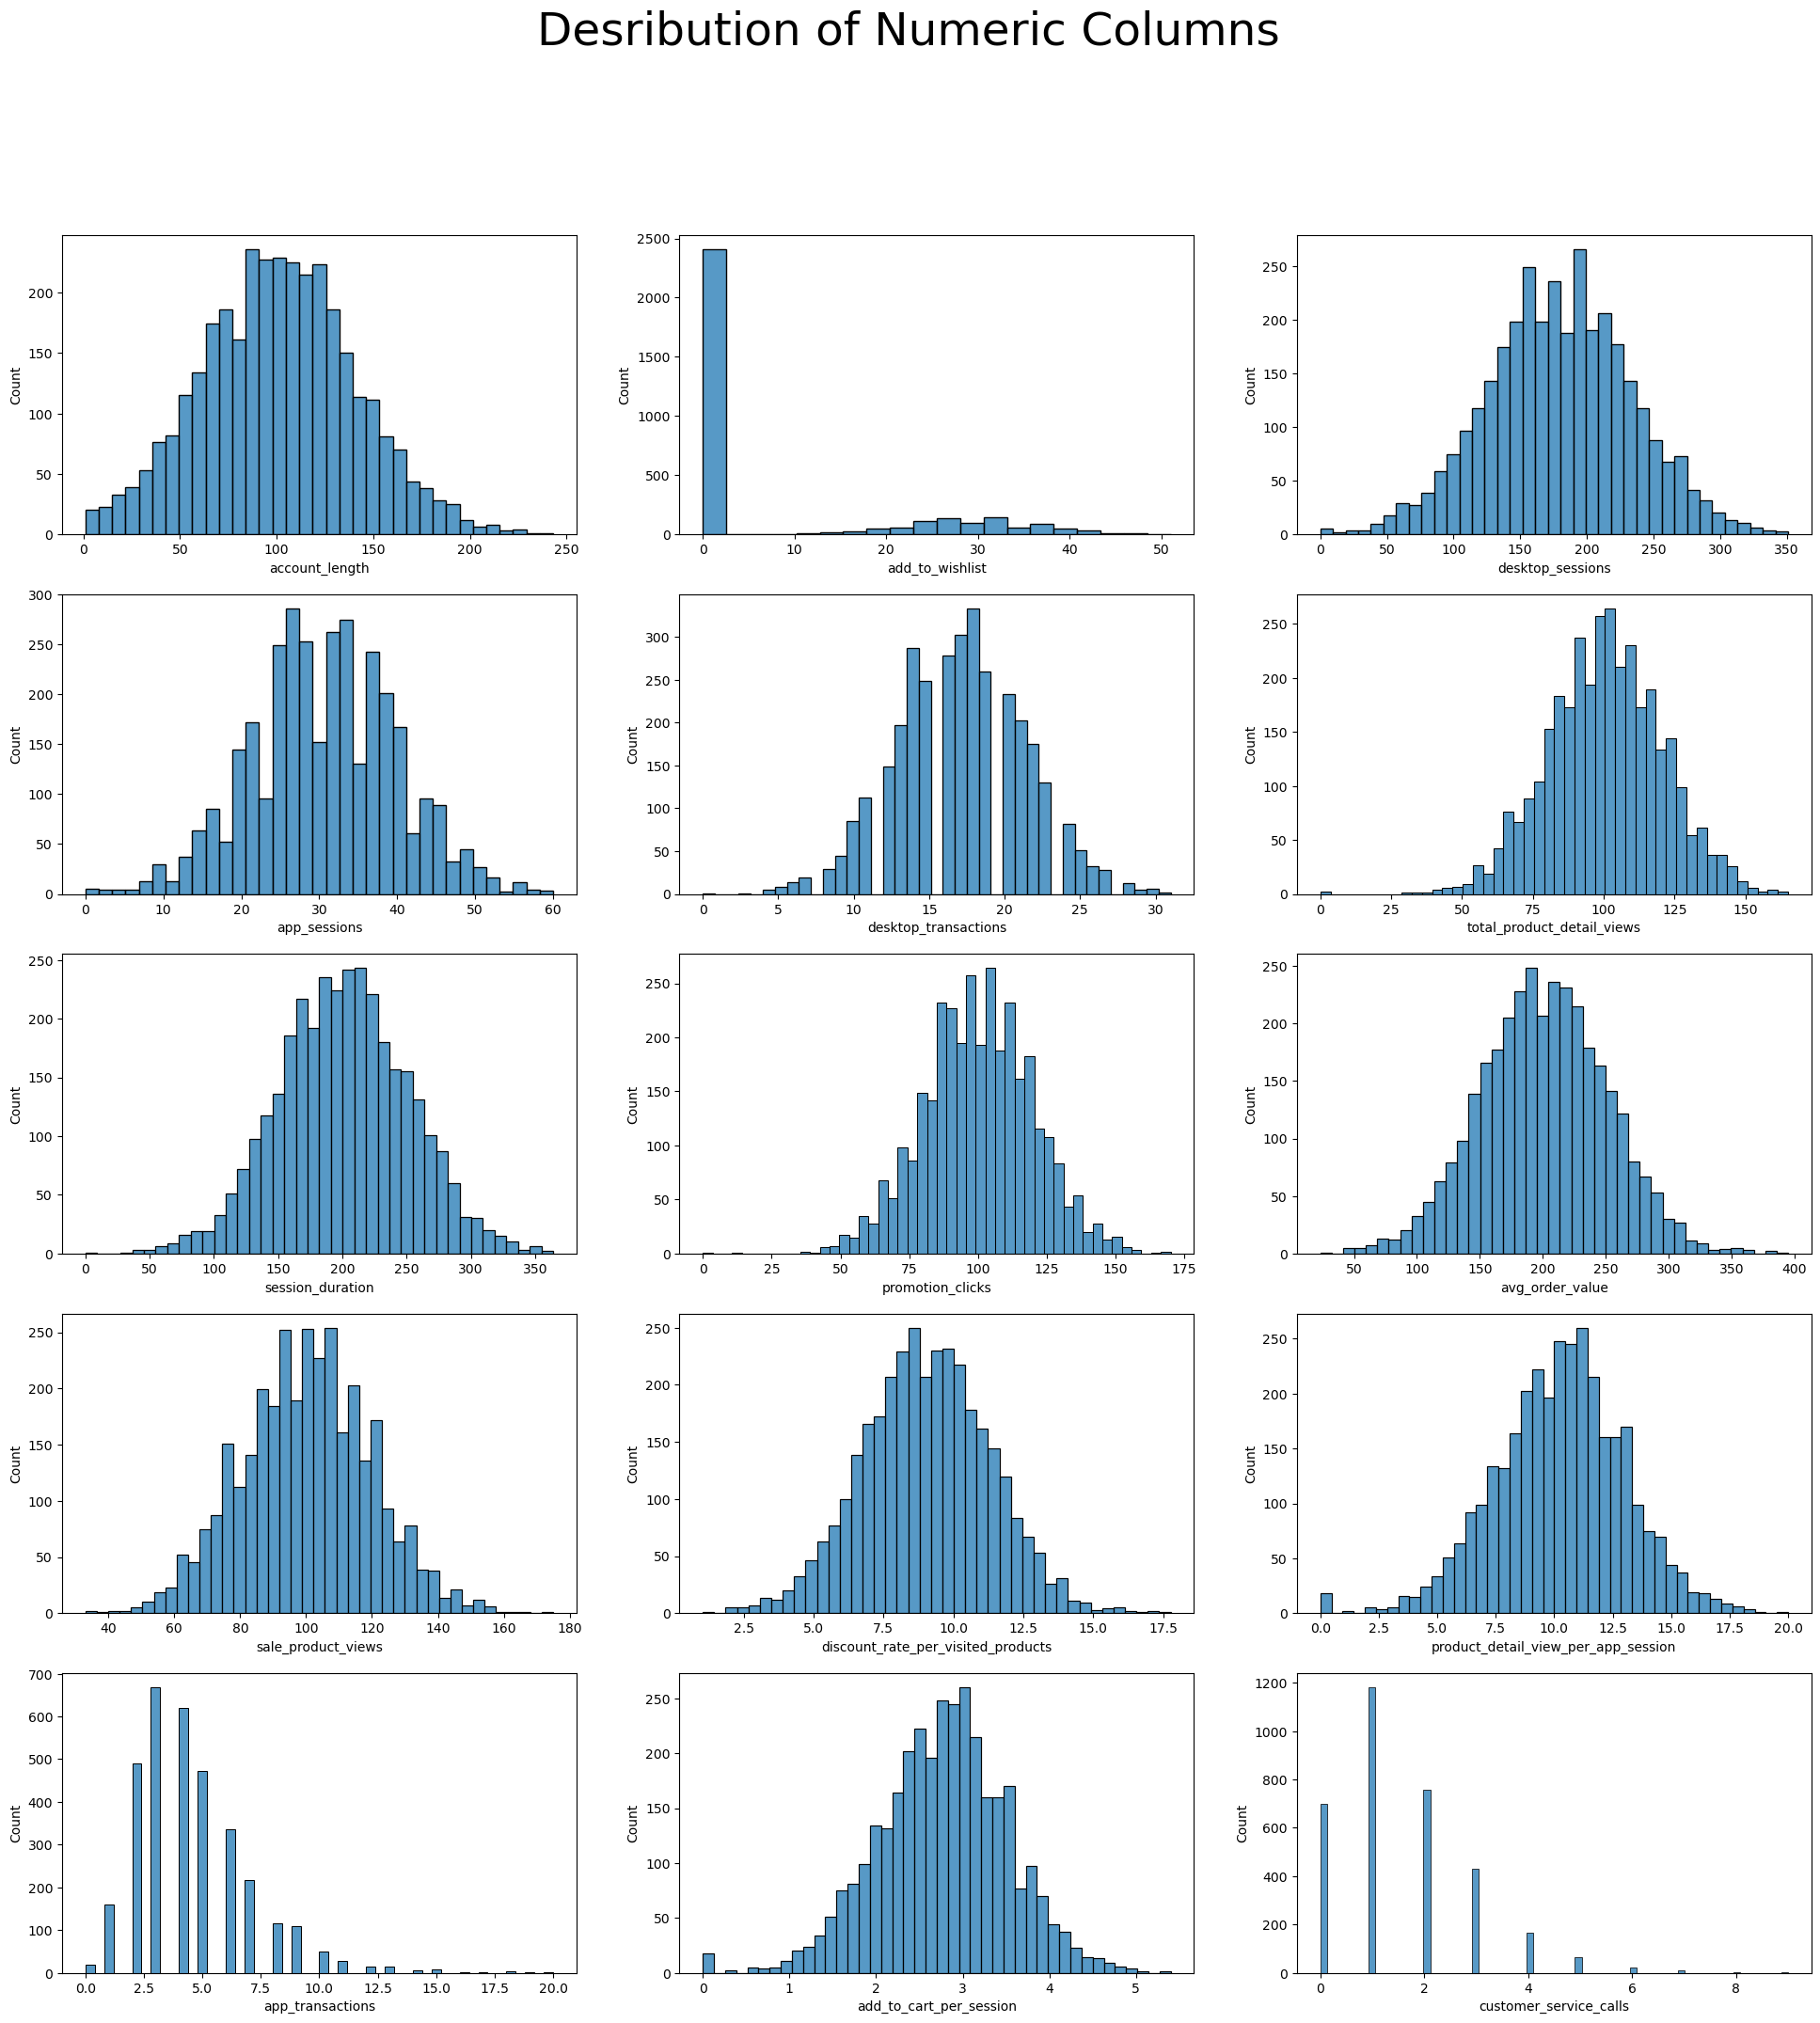

In [28]:
numeric_cols = [
       'account_length',
       'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn']

fig , axes = plt.subplots(5,3, figsize= (24,24))
fig.suptitle('Desribution of Numeric Columns', size = 35)

for i in range(5):
    for j in range(3):
        sns.histplot(df[numeric_cols[3*i+j]], ax= axes[i,j])

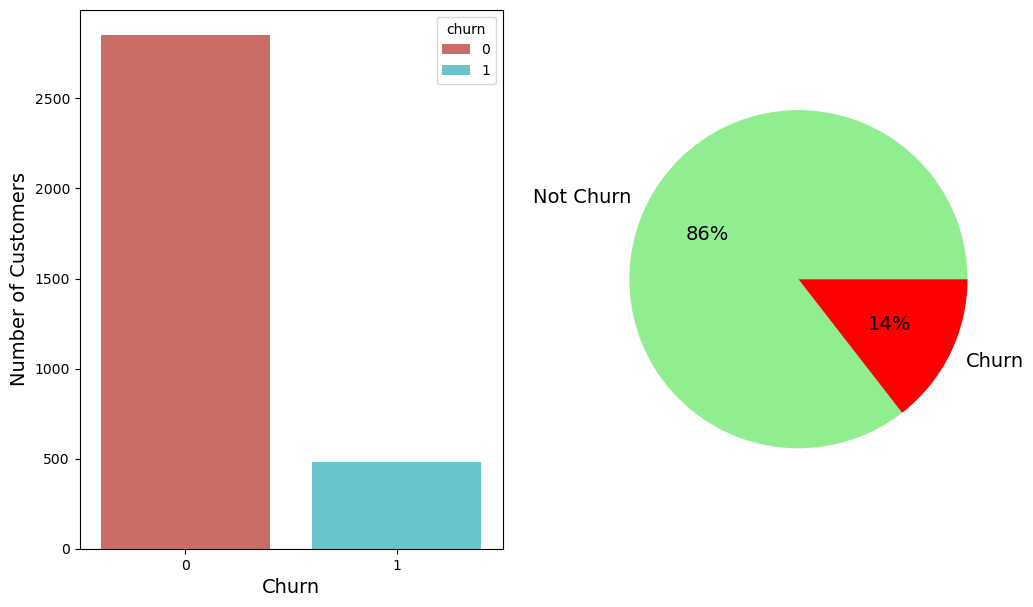

In [27]:
fig , ax = plt.subplots(1,2,figsize = (12,7))

plt.pie(df.churn.value_counts(), labels = ['Not Churn', 'Churn'], colors = ['lightgreen','red'], autopct= '%.0f%%', textprops={'fontsize':14})

cplot = sns.countplot(x= df['churn'], ax= ax[0], hue=df['churn'], palette= 'hls')
cplot.set_xlabel('Churn', fontsize= 14)
cplot.set_ylabel('Number of Customers', fontsize= 14)

plt.show()

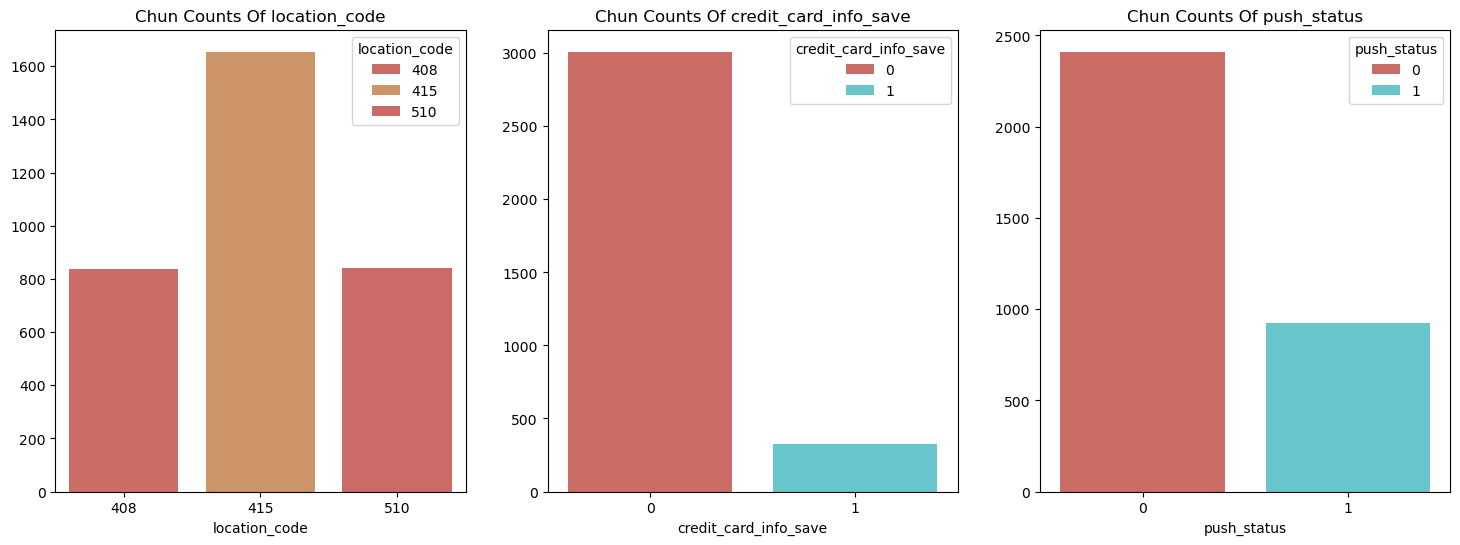

In [32]:
categorical_cols = ['location_code','credit_card_info_save','push_status']

for i in df.select_dtypes(include=['object']).columns.values:
    df[i] = df[i].replace(['yes','no'],[1,0])

fig, ax = plt.subplots(1, len(categorical_cols), figsize = (18, 6))
for i , a in zip(categorical_cols, ax):
    temp = df[i].value_counts()
    a.set_title('Chun Counts Of ' + str(i))
    sns.barplot(ax= a, x= temp.index, y=temp.values, hue=temp.index, palette= 'hls')

plt.show()

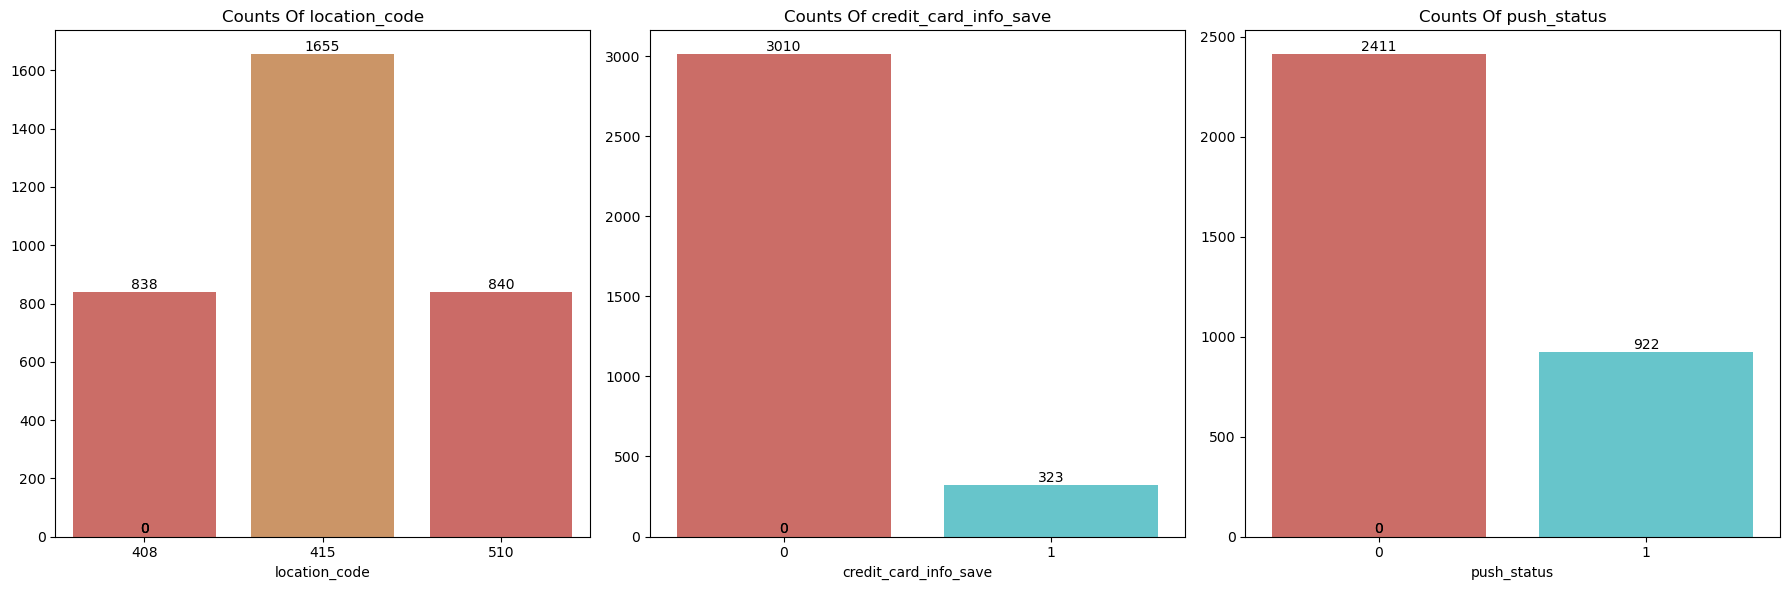

In [39]:
# Replace 'yes' and 'no' with 1 and 0 in object columns
for col in df.select_dtypes(include=['object']).columns.values:
    df[col] = df[col].replace(['yes', 'no'], [1, 0])

categorical_cols = ['location_code', 'credit_card_info_save', 'push_status']

fig, ax = plt.subplots(1, len(categorical_cols), figsize=(18, 6))

for col, axis in zip(categorical_cols, ax):
    # Get value counts for the current categorical column
    temp = df[col].value_counts()
    axis.set_title('Counts Of ' + str(col))
    
    # Create the bar plot
    barplot = sns.barplot(ax=axis, x=temp.index, y=temp.values, hue=temp.index, palette='hls', dodge=False)
    
    # Add value labels on top of each bar
    for bar in axis.patches:
        height = bar.get_height()            # Get the height of the bar which equals the count
        x_position = bar.get_x() + bar.get_width() / 2  # Calculate the center of the bar
        # Place text above the bar, adjusting vertically (offset = 1 unit can be changed)
        axis.text(x_position, height + 1, int(height), ha='center', va='bottom', fontsize=10)
    
    # Optionally, remove the legend if it's unnecessary
    axis.get_legend().remove()

plt.tight_layout()
plt.show()